# Machine learning-ready mental health datasets for evaluating psychological effects and system needs in Mexico City during the first year of the COVID-19 pandemic

## Carlos Rodrigo Garibay Rubio, Katsuya Yamori, Genta Nakano, Silvia Morales Chaine, Rebeca Robles Garcıa, Diana Iris Tejadilla Orozco, Edgar Landa-Ramırez, Alexis Bojorge Estrada, and Astrid Rennee Peralta Gutierrez

# Introduction

The study titled "Unveiling the 72-hour psychosocial response at first-level mental health support systems during emergency contexts, Mexico City case" submitted to the International Journal for Disaster Risk Reduction on February 28, 2024 mainly uses two databases to evaluate mental health changes triggered under different emergency scenarios proving useful for decision makers regarding first level mental health support systems. Nevertheless, the data article titled "Machine learning-ready mental health datasets for evaluating psychological effects and system needs in Mexico City during the first year of the COVID-19 pandemic" goes further on the data analysis particularly in relation to effects related with psychological disorders, and proves that the databases are suitable for performing further analysis and in particular to make use of it as a training set for machine learning algorithms, in order to predict the development of mental health symptoms on a certain population, which will be shown on this data article. 

The database from the  “Questionnaire for the detection of risks to mental health COVID-19" was constructed following the protocol approved by the Ethics Committee from the “Instituto Nacional de Psiquiatría Ramón de la Fuente Muñiz" (Approval Code: CEI/C/010/2020) and the Faculty of Psychology (UNAM), where Informed consent was obtained from all subjects, as mentioned in a previous article Morales et al.2021.

The questionnaire and the statement for protection of personal information can be accessed in \url{https://misalud.unam.mx/}. The database comprised of the responses of 36,552 users to 23 questions for 240 straight days on 2020.

The database from the lifeline emergency phone call service system does not retrieve any personal information (maintains anonymity) from the start and according to Mexican regulations established by the National Council from the National System for Transparency (Published in the Official Diary of the Federation (May 4, 2016), they are publicly available for statistical analysis under demand. 

The study was conducted in accordance with the Declaration of Helsinki. It is also held following the Code of Conduct for Scientists established by the Science Council of Japan. 

# 0:  Packages and modules

The database analysis make use of the following packages:

In [1]:
import csv
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from mpl_toolkits import mplot3d
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
import sklearn.metrics
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn import neighbors, svm, preprocessing
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
import modules as md

## Parsing

The databases were parsed to retrieve the elements useful for identifying the psychological effects related with post-traumatic stress disorde, depression and general anxiety. Nevertheless, the dataset can be parsed to extract relations across a wider range of vectors.

In [1]:
%run parsing.py

## Vectors refering to symptoms reported by users in the questionnaire "Questionnaire for the detection of risks to mental health COVID-19" 

The key vectors for evaluating changes in mental health are retrieved due to its relationship with psychological disorders. 

- Anxiety questions: 54, 55, 56, 57, 67, 68.
- Stress questions: 37, 38, 39, 40, 44, 48, 53.
- Avoidance questions: 41, 42, 43.
- Information Seeking question: 64.
- Distancing questions: 45, 46, 49, 50, 51.
- Somatization question: 62.

## Vectors refering to the support mental health service behavior ("Lifeline service")

The vectors selected from the "lifeline phone service" were the next ones:

- Enterqueue
- Connected calls
- Abandoned call attempts
- Waiting time before abandoning
- Waiting time before connection
- Call duration

# 1. Data description 

## 1.1 Objective

The study analyzed the results of interactions with first-level mental health services in Mexico City, using high-resolution time scale data (day-by-day) for short periods (+- 72 hours) undertwo scenarios: the COVID-19 pandemic (13/04/2020 - 07/12/2020) and earthquakes with early warnings (13/04/2020 - 10/04/2023), looking to identify significant changes in the mental health sphere possibly triggered by different types of events (public announcements, start of pandemic measures, mental health promotion, festivities, and earthquakes with early warnings). The time ranges used can be retrieved through the appropriate py file allowing users to select their own time slices and applying it to the data set.

The database of the "Questionnaire for the Detection of Risks to Mental Health COVID-19" also refered as "Screening tool for mental health problems" is comprised of the responses of 36,552 users. While the study does not use all the possible vectors. The whole questionnaire is broader and is separated into the following sections: 

- Socioeconomic self-report
- Present chronic health conditions
- COVID-19 symptoms and diagnosis
- Loss of loved ones
- Lockdown status
- Screen for mental health symptoms consisting of 27 questions that can be divided into acute stress with seven items, avoidance and sadness with five items, distancing and anger with seven items, generalized anxiety with four items, health-related anxiety with four items, and extra factors: Binge alcohol consumption with three items and Experience of abuse with two items.

In regard of the "Lifeline phone service", records of 349,202 calls over 280 (non consecutive) days covering the time periods asociated with the events were analyzed.

## 1.2 "Questionnaire for the detection of risks to mental health COVID-19 description"

### 1.2.1 Time distribution "Questionnaire for the detection of risks to mental health COVID-19"

The usage distribution of the "Questionnaire for the detection of risks to mental health COVID-19" along time (240 days of the sample) can be seen on the next histogram. The data set allows to parse time up to seconds. Nevertheless, the decided timeframe is daily.

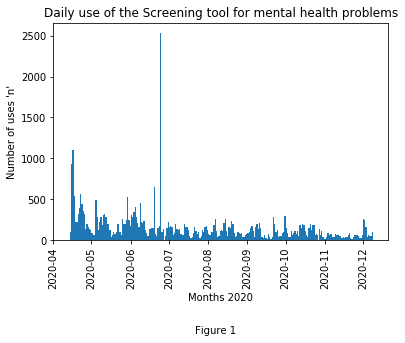

In [3]:
%run tamizaje_hist.py

### 1.2.2 General distribution of "Questionnaire for the detection of risks to mental health COVID-19" sample

In [ ]:
#md.dispersion(anx_array)
#md.dispersion(str_array)
#md.dispersion(avo_array)
#md.dispersion(dis_array)
#md.dispersion(inf_1)
#md.dispersion(som_1)

<center><b>General dispersion by symptom cluster</b></center>

|Measure | Anxiety | Stress | Avoidance | Distancing | Information seeking | Somatization |
| :-----: | :-----: |:-----: |:-----: | :-----: | :-----: |:-----: |
| Min     | 0     |     0   |    0    |     0    |           0     |          0   |
| Max     | 10     |  10    |  10   | 10     |  10    | 10    |
| Range   | 10     |  10   |  10   | 10     | 10     | 10    |
| 25th Percentile       | 0    |  0    | 0     | 0    | 0   |  0 |
| 75th Percentile       | 8    |  7    | 5     | 7    | 3   | 2 |
| Inter-quartile range  | 8    |  7    | 5     | 7    | 3   | 2 |
| Variance              | 14   | 12.4  |  10.1 | 13.9 | 7.2 | 7.8 |
| Standard deviation    |  3.7 |  3.5  | 3.2   | 3.7  | 2.7 | 2.8 |

<center><b>Table 1</b></center>

### 1.2.3 Distribution of symptoms

A general analysis using histograms of the behavior of the type of responses for all items grouped by class of symptoms, reveals that only in a small percentage of cases, acute symptoms are present, being anxiety the leading one.

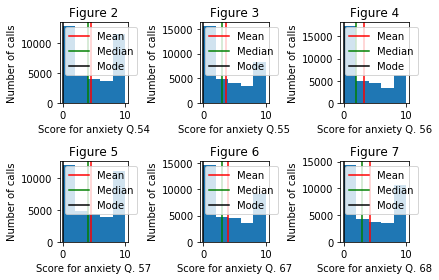

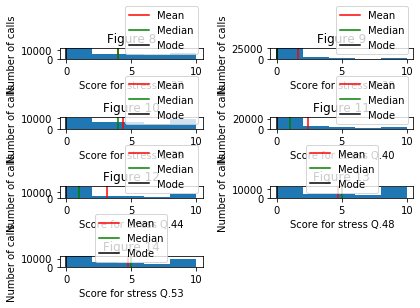

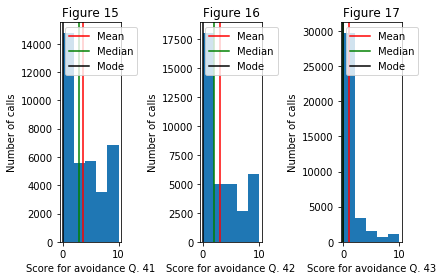

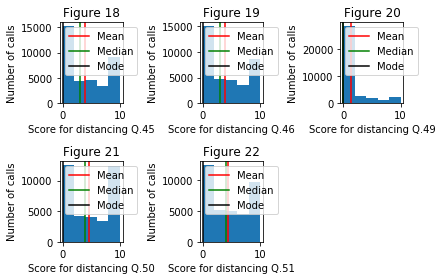

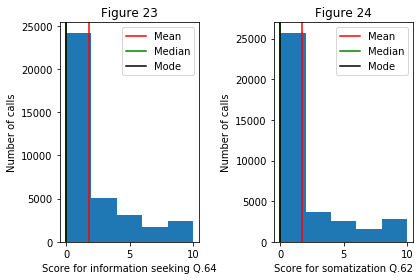

In [2]:
%run distribution_anx.py
%run distribution_str.py
%run distribution_avo.py
%run distribution_dis.py
%run distribution_mix.py

### 1.2.4 Label for disorders

Through the creation of labels, the dataset is suitable for performing supervised machine learning algorithms. For this complementary study, 

## PTSD

The label for PTSD was attached if all next requirements are fulfilled following the criteria in the DSM-V-TR (Questions number 37 to 53):

- A: Exposure to stressful event	
- B: One or more items of questions 37 to 40 with answers of 2 or above.
- C: One or more items of questions 41 to 42 with answers of 2 or above.
- D: Two or more items of questions 43 to 48 with answers of 2 or above.
- E: Two or more items of questions 49 to 53 with answers of 2 or above.

## Generalized anxiety 

The label was ascribed if a total score of three or more results from the sum of the items (Questions 54 to 58).

## Depression

The recommended cut-off point was a score of three or over based on the sum of the items (Questions 67 and 68). 


### 1.2.5 Principal component analysis

In [1]:
%run pca_analysis.py

PCA(n_components=23)

First PC  : [0.28611522 0.26645402 0.22654661 0.27972847 0.24943128 0.27333121
 0.19684074 0.11587674 0.21621833 0.17231612 0.18813252 0.25643617
 0.23345803 0.16023607 0.12078086 0.03966317 0.24515783 0.21832094
 0.10228215 0.24257222 0.24141024 0.11811403 0.07234777]
Second PC : [-0.0649199  -0.13241025 -0.12011603 -0.1697793  -0.29188769 -0.27820464
  0.31214342  0.14305964  0.35442261  0.24914533  0.23694379  0.08077132
  0.35217258  0.2636807   0.25583249  0.05252301 -0.18804984 -0.08378551
 -0.14104788 -0.15029483 -0.19441891  0.10949433  0.08794094]
3 PC      : [-0.10961071 -0.06866585 -0.06513182 -0.07647861  0.09338088  0.01783625
 -0.21944723 -0.07310542 -0.13246351 -0.11198314 -0.11325121 -0.00785346
 -0.1834788   0.55329746  0.64405297  0.08294262  0.15175105  0.2035311
  0.0463328  -0.04425706  0.01148335 -0.11346525 -0.15688927]
4 PC      : [ 0.26268751  0.21732104  0.27632309  0.26240121 -0.21539062 -0.06604267
 -0.06151282 -0.01677062 -0.00660766  

For evaluating the relationship between the symptom dimensions, a principal component analysis was performed on the 23 vectors corresponding to the selected questions of the questionnaire due to its relationship with the PTSD criteria supported in the PCL-5 evaluation tool. 

The PCA analysis suggest that the "anxiety dimension" in its first component explains half of the variance of the data sample (more than 50%). While a more regularly distribution happens between the rest of the 22 components.

This means that anxiety is mostly related with the changes in symptom behaviors which is aligned with previous researches using structural equation modeling to infer causal relations between symptoms.

## 1.3 "Lifeline service"

### 1.3.1 Time distribution "Lifeline service"

The sample distribution of the "Lifelineservice" consists of time frames. The first one covering from 24/5/2020 - 31/12/2020 and then -72 hours + 72 hours surrounding earthquake events for year 2021, 2022 and up to 6/04/2023. A scatterplot covering the 280 days of the sample allows us to see the general distribution of the sample.

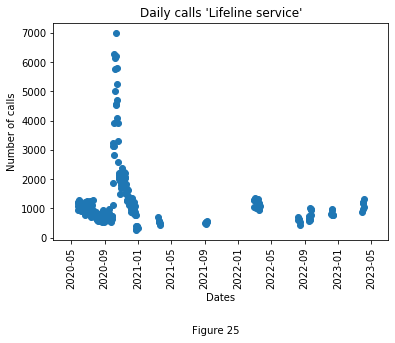

In [5]:
%run lifeline_scatter.py

### 1.3.2 General distribution of "Lifeline service" sample

The sample shows high levels of variance between its elements.

<center><b>General dispersion on lifeline service vectors</b></center>



|Measure	| Enterqueue (n)	| Connected (n)	| Abandoned	(n)|Time before connexion (seconds)	|Time before abandoning	(seconds)|Call duration (seconds)|
| :-----: | :-----: |:-----: |:-----: | :-----: | :-----: |:-----: |
|Min	|248	|200	|10	|0.6	|12.5	|151.5|
|Max	|7010	|1748|	5712|	392.8|	1212.5	|1273|
|Range	|6762	|1548	|5702	|392.2	|1200	|1121.5|
|25th Percentile |	692	|520	|85.5	|9.6	|71.1	|339.7|
|75th Percentile	|1255	|935	|502.5	|61	|118.2	|506.4|
|Inter-quartile range	|563	|415	|417	|51.5	|47.1	|166.7|
|Variance	|1143865.6	|82682.8	|854705	|4850.4	|7210.7	|32120.5|
|Standard deviation|	1069.5	|287.5	|924.5	|69.6	|84.9	|179.2|

<center><b>Table 2</b></center>

### 1.3.3 Distribution of lifeline vectors.

A general analysis using histograms of the behavior of the lifeline service in regard with the calls received, attended, waiting times and call duration, shows that their distributions are in general very skewed toward smaller values.

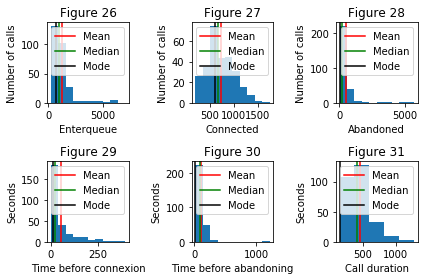

In [6]:
%run distribution_ll.py

### 1.3.4 Principal component analysis lifeline


The principal component analysis performed on the lifeline vectors showed that the explained variance ratio associated with the "enterqueue" contributes to 93% of the variance, therefore, it was used as a reference to extract the maximum change for all other dimensions, later used for performing further analysis.

In [11]:
%run pca_lifeline.py

PCA(copy=True, iterated_power='auto', n_components=6, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

First PC  : [0.75461019 0.10759626 0.64633651 0.03225434 0.01390968 0.00133976]
Second PC : [ 0.28046879  0.71887908 -0.43778588 -0.11257146 -0.13174066 -0.427628  ]
3 PC      : [ 0.13490022  0.36840276 -0.23203996  0.18336077  0.10550605  0.86457278]
4 PC      : [ 0.0133084   0.05316602 -0.04894864  0.07717116  0.97901527 -0.17370666]
5 PC      : [-0.02531297  0.01223162 -0.01818805  0.97293321 -0.1131722  -0.19867526]
6 PC      : [-0.57696168  0.57700873  0.57794751 -0.01057042  0.00636765  0.00073324]
280

Explained variance ratio
[9.37642780e-01 5.23406918e-02 7.29596895e-03 2.31238492e-03
 4.05948827e-04 2.22506437e-06]


# Visualizations

The databases have been arranged to create arrays which easily can be used to perform complex interaction understanding.

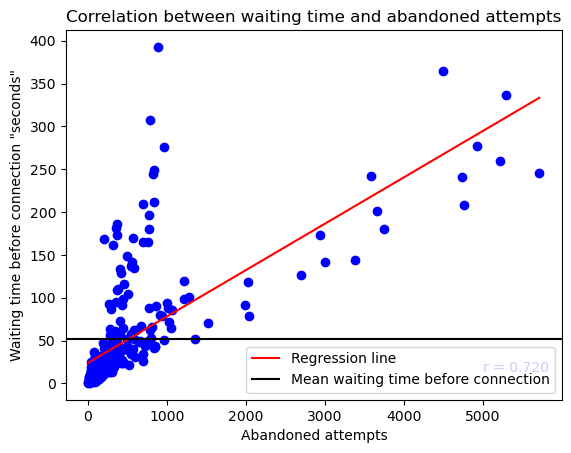

In [39]:
%run correlations_lifeline.py

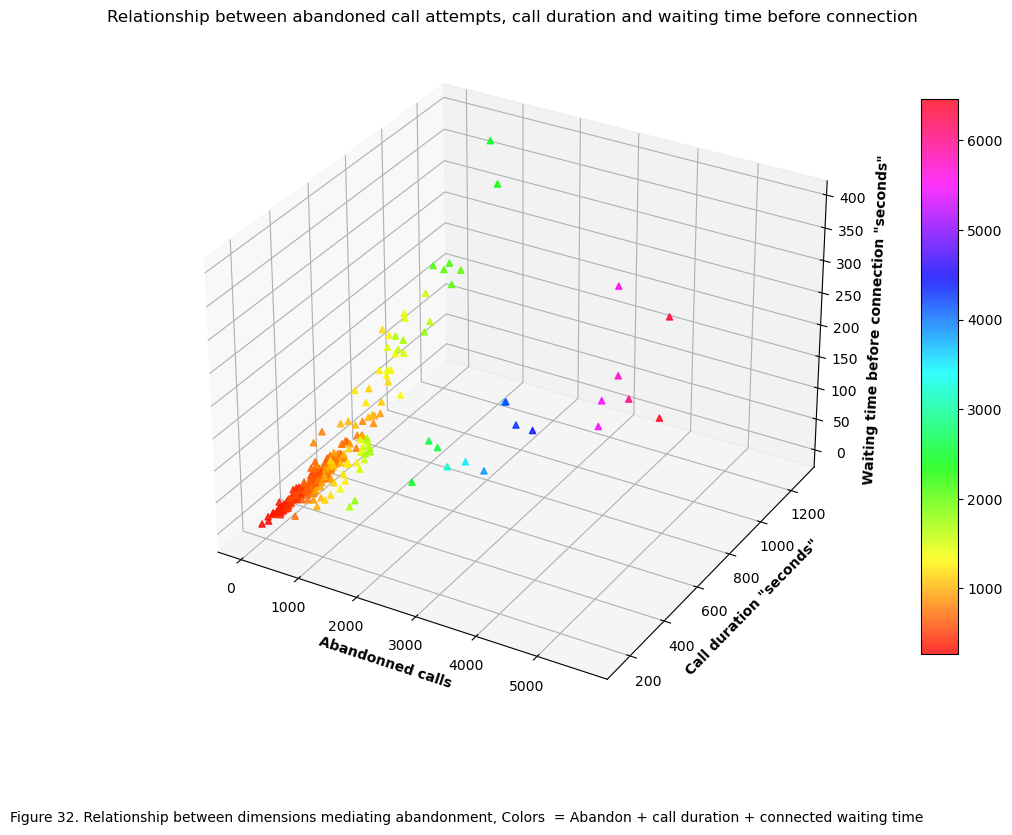

In [41]:
%run 3d_plot.py

# 2 Results 

## 2.1 General results for type of events behavior across services

Looking to evaluate the effects that the different type of events produced across platforms (Questionnaire for the Detection of Risks to Mental Health COVID-19 and the Lifeline service), the mean of the percentual change and time of the different type of events was extracted once grouped, resulted on the following findings: 

- Complex events produce the higher percentual changes, with extreme increases very fast (24 hours). 
- Stacked events produced very large increases, above what can produced the events separated with delayed effects (above 40 hours).
- Earthquakes, as single events are the ones triggering large percentual changes mostly around 40 hours after the event.
- Festivities produced medium percentual changes around 30 hours around the event, but their effects last longer than other events along the days and can easily stack with others.

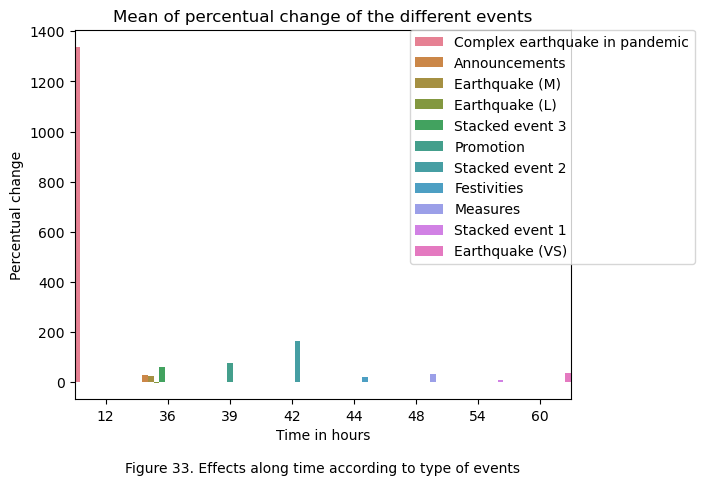

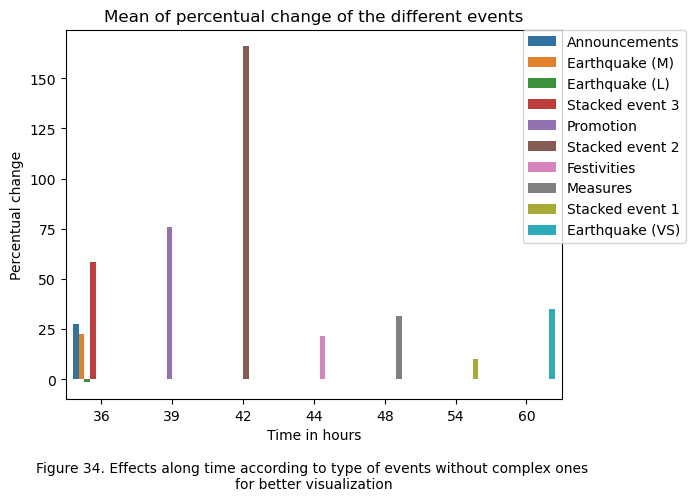

In [30]:
%run gen_res.py

## 2.2 System overload regarding the type of events

An analysis of the call duration obtaining the mean of abandonment proportion in regard to the days of the corresponding quartile, shows that earthquakes produce larger abandonment rates as the call duration increases, being this type of events the ones producing higher overload possibilities.

For the case of earthquakes, when the proportion of abandonment was equal or superior to 50% (there are more abandoned calls than connected) the next changes can be seen:

- The enterqueue mean was about 963 calls on the day with the minimum enterqueue number was of 556 calls.
- The mean duration of calls is around 820 seconds, with the minimum call time of about 526 seconds.

Therefore, a possible benchmark for system overload can be suggested by considering the presence of high magnitude earthquakes and/or an enterqueue above 556 calls and/or the presence of call durations above 526 seconds.


# 3. Machine learning

The databases were scaled to fit diagnostic criterias in regard with common used PTSD evaluation (PCL-5) tools and then mapped to look for optimal algorithm performance.

## 3.1 Questionnaire for the Detection of Risks to Mental Health COVID-19

### 3.1.2 Preprocessing

In [18]:
#%run preprocessing_opt.py

### Scaling and mapping

Four strategies were followed to evaluate the machine learning efficiency considering the possible effects of the outliers (relevant for the study). The mapping was performed using the quantile transformer algorithm for all strategies: 

- 1. Maintaining the data without transformations. 
- 2. Normalizing the data
- 3. Scaling using the standard scaling algorithm.
- 4. Scaling using the robust scaling algorithm.

The better fitting resulted from the strategy without scaling or normalization. It is possible that the original data with whole integers between 0 and 4 is well suitted for MLP machine learning.


### 3.1.3 Example of simple classification

A K neighbors classification algorithm is used for visualizing the decision surface for high ptsd risk present (0 or 1) when evaluating anxiety and scute stress (Anxiety vector explains around 50% of the variance acoording to the PCA analysis).

Data shape:    (36481, 2)
Labels shape:  (36481,)
Using the K neighbors classifier


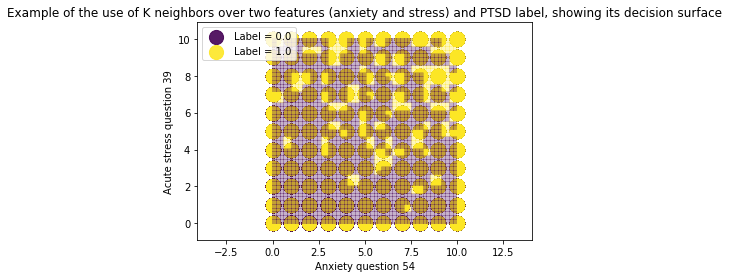

In [3]:
%run ann.py

### 3.1.4 Multi-layer perceptron (MLP) classifier algorithm

A MLP classifier was trained using 70% of the sample to predict the possibility to develop PTSD according with the items closely related with the PCL-5 test following the DSM-V-TR criteria, and evaluated under different optimization strategies.

The results show that the data set can be used as training set for evaluating further events and setting intervention strategies. 

Classification rate (training_raw) = 0.9674040490893457
Classification rate (test_raw)     = 0.9665329199343425
Overall classification rate: 0.962865766915922


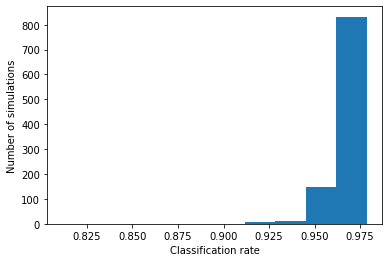

Classification rate (training_nor) = 0.9537246931915891
Classification rate (test_nor)     = 0.9524895130403064
Overall classification rate: 0.7394505745030093


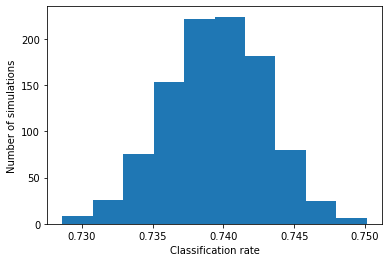

Classification rate (training_standard) = 0.9405143437817557
Classification rate (test_standard)     = 0.9409994528542769
Overall classification rate: 0.9385646543862849


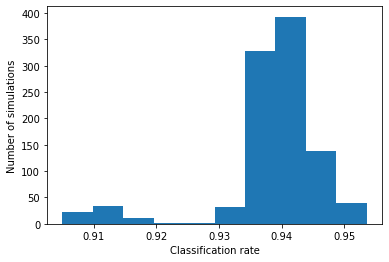

Classification rate (training_robust) = 0.9407488470257171
Classification rate (test_robust)     = 0.942732080977567
Overall classification rate: 0.9380422214116358


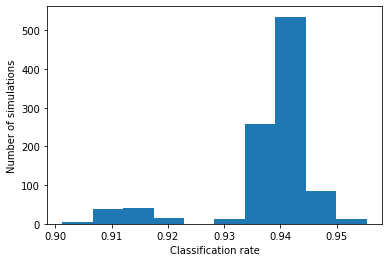

In [17]:
%run mlp_analysis.py

<center><b>Comparison of the classification rates of the different strategies</b></center>

| Strategy | Classification rate mean running 1000 iterations with random test samples of 0.3 size using MLP algorithm with 10,000 iterations of the neural network|
|:--:|:--:|
| Maintaining the data without transformations | 0.962|
| Normalizing the data | 0.739 |
| Scaling using the standard scaling algorithm | 0.938 |
| Scaling using the robust scaling algorithm | 0.938 |

<center><b>Table 3</b></center>


## 3.2 Lifeline service

### 3.2.1 A support vector machine (SVM) algorithm

A support vector machine algorithm trained using the whole enterqueue vector as "one feature regression" showed that the predictions were mostly above the true data points of the sample, particularly for the time ranges surrounding very strong earthquakes. 

A wider database containing a wider time range (not only the time ranges asociated with the events) could improve the model possibly improving the prediction rate. 

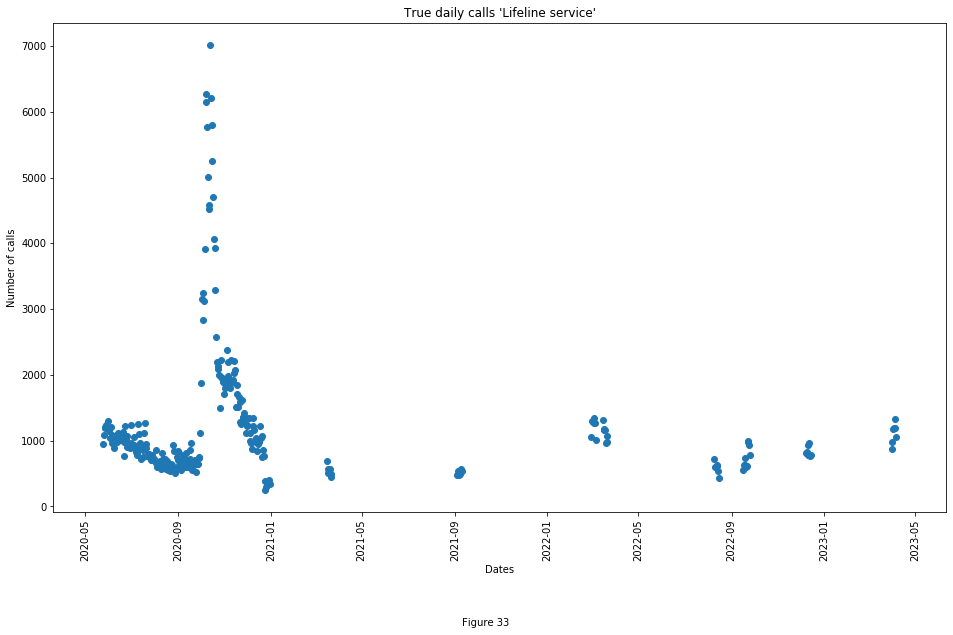

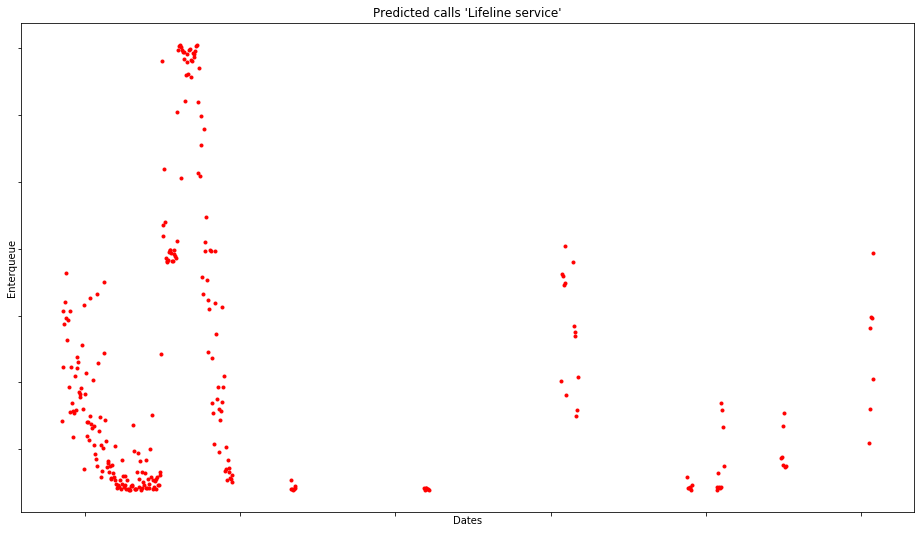

In [18]:
%run svm_lifeline.py

# 4. Conclusions

The databases have potential to be used as training sets or as basis for further research about the effects of the pandemic and earthquakes on the psycosocial sphere, while the methodologies used can be replicated on similar datasets.

As results of the machine learning algoriths applyed we could extract the following additional remarks: 

- The PCA allows us to see that anxiety by much explains the variance in the sample, particularly by its first item, question 54 for the Questionnaire for the Detection of Risks to Mental Health COVID-19, while the enterqueue has the same effect for the Lifeline support service.
- The MLP model is capable of predicting with a high classification rate (0.962) the appearance of symptoms associated with PTSD once trained on the training set.
- There were no significant improvement in the neural network model performance between the algorithms used. The normalizing method reduced the performance of the model.
- The present data set can contribute to further develop AI systems to identify, follow and suggest courses of action for emergency mental health support systems more timely than the actual disaster recovery curve suggests. 
